# Exercise: K-means
## Visualize the prostitution data (e.g. by plotting it on a map)

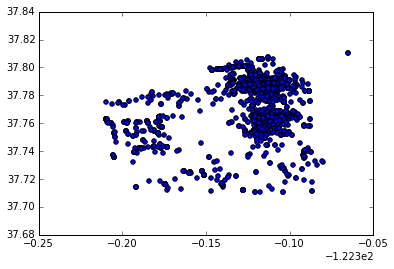

In [91]:
# Imports
import csv
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist
%matplotlib inline

Data = []
with open('SFPD_Incidents_-_from_1_January_2003.csv') as f:
    reader = csv.DictReader(f, delimiter=',')
    for row in reader:
        if(row['Category'] == 'PROSTITUTION' and row['Y']!='90'): 
            Data.append([row['X'],row['Y']])

X=[]
Y=[]

for lt in Data:
    X.append(lt[0])
    Y.append(lt[1])

plt.scatter(X,Y)
plt.show()

## Train models of K=2,…,10 on the prostitution data.

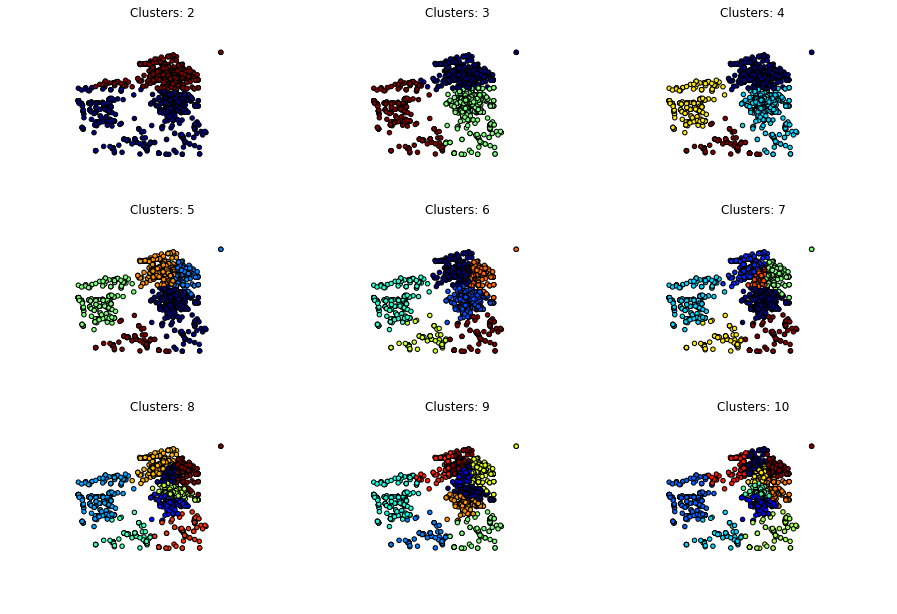

In [92]:
# Fit the data
fig = plt.figure("K-Means",figsize=(15, 10))
for i in range(2,11):
    kmean = cluster.KMeans(n_clusters=i)
    kmean.fit(Data)

    plt.subplot(3,3,i-1)
    plt.title('Clusters: '+str(i))
    plt.axis('off')
    plt.scatter(X,Y,c=kmean.labels_)

plt.show()

## Explore how the total squared error changes as a function of KK and identify what you think is the right number of clusers based on the knee-point in the squared error plot.

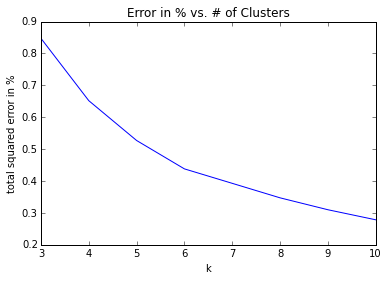

In [97]:
from scipy.spatial.distance import cdist, pdist
#Fit the kmeans model for each clusters = k
k_means_var = [cluster.KMeans(n_clusters=i).fit(Data) for i in range(3,11)]

# Pull out the cluster centers for each model
centroids = [k.cluster_centers_ for k in k_means_var]

#Calculate the Euclidean distance from each point to each cluster center
k_euclid = [cdist(Data,cent,'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# Plot the data
plt.xlabel("k")
plt.ylabel("total squared error in %")
plt.title("Error in % vs. # of Clusters")
plt.plot(range(3,11),wcss1)
plt.show()

## Making the csv file for week 8

In [ ]:
# make the csv file
with open('Kmeans.csv', 'wb') as csvfile:
    writer = csv.writer(csvfile, quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Clusters', 'X', 'Y','Label','CenterX','CenterY'])
    for mean in range(2,7):
        # Fit the data
        kmean = cluster.KMeans(n_clusters=mean)
        kmean.fit(Data)
        X=[]
        Y=[]

        for lt in Data:
            X.append(lt[0])
            Y.append(lt[1])
            
        for count in range(0,len(X)):
            writer.writerow([mean,X[count],Y[count],kmean.labels_[count],kmean.cluster_centers_[kmean.labels_[count]][0],kmean.cluster_centers_[kmean.labels_[count]][1]])